<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).


In [1]:
# Check for GPU
!nvidia-smi

Fri Feb 28 14:18:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0              9W /   70W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu118


'cuda'

## 1. Model kami berkinerja buruk (tidak cocok dengan datanya). Apa 3 metode untuk mencegah underfitting? Tuliskan dan jelaskan masing-masing dengan sebuah kalimat.


1. **Menambahkan layer lebih pada model (Untuk menambahkan kompleksitas model)**:. Ini akan memberikan kesempatan pada model untuk belajar pola ecara umum untuk data latih. Contohnya, daripada menggunakan 2 hidden layer, kita gunakan 4 hidden layer

2. **Gunakan transfer learning**: Transfer learning membantu untuk mencegah underfitting dengan menaikkan model yangg sudah ada, dari model/dataset lain, dan kita gunakan kembali untuk masalah kita

3. **Train lebih lama**: Berikan model kesempatan lebih untuk berlatih (perbanyak epochs)


## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.


In [3]:
# 1. Get data
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

image_path

WindowsPath('data/pizza_steak_sushi')

In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [6]:
# Setup train and testing paths
train_dir, test_dir = image_path/"train", image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [7]:
# Visualize an image
import random 
from PIL import Image

# 1. Ambil path semua gambar
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg')]


In [8]:
# 2. Ambil path gambar acak
random_image_path = random.choice(image_path_list)
random_image_path

WindowsPath('data/pizza_steak_sushi/train/sushi/307738.jpg')

In [9]:
# 3. Ambil kelas dari gambar acak kita
image_class = random_image_path.parent.stem
image_class

'sushi'

Path gambar acak: data\pizza_steak_sushi\train\sushi\307738.jpg
Kelas gambar: sushi
Tinggi gambar: 382
Lebar gambar: 512


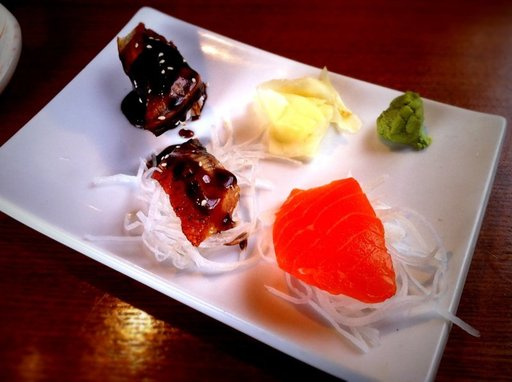

In [10]:
# 4. Buka gambar
img = Image.open(random_image_path)

print(f"Path gambar acak: {random_image_path}")
print(f"Kelas gambar: {image_class}")
print(f"Tinggi gambar: {img.height}")
print(f"Lebar gambar: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(381.5), np.float64(-0.5))

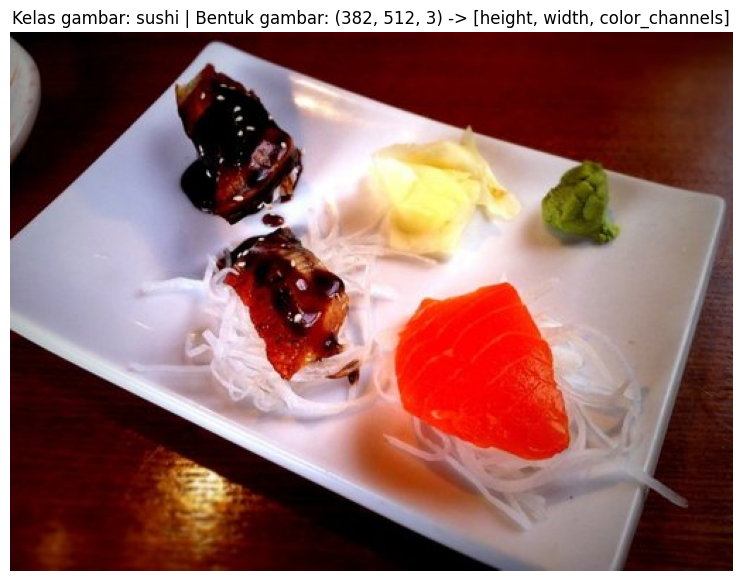

In [11]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Ubah gambar menjadi array karena akan kita masukkan kedalam matplotlib
img_as_array = np.asarray(img)

# Plot gambar
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Kelas gambar: {image_class} | Bentuk gambar: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)



Kami punya beberapa gambar di folder kami.

Sekarang kita perlu membuatnya kompatibel dengan PyTorch dengan:

1. Ubah data menjadi tensor.
2. Ubah data tensor menjadi `torch.utils.data.Dataset` dan kemudian menjadi `torch.utils.data.DataLoader`.


In [12]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [13]:
# Write transform for turning images into tensors
data_transform = transforms.Compose([
  transforms.Resize(size=(64,64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])


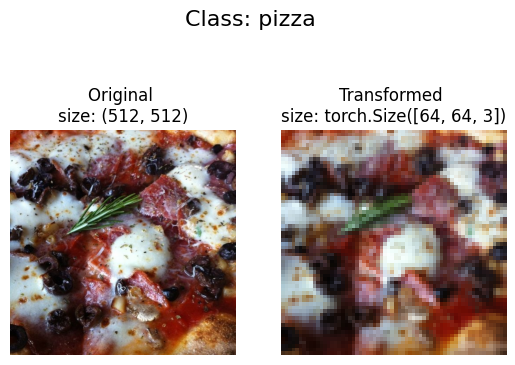

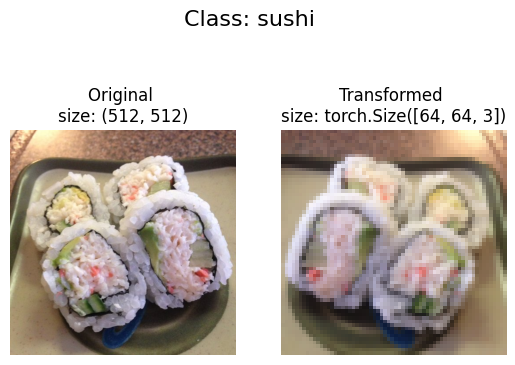

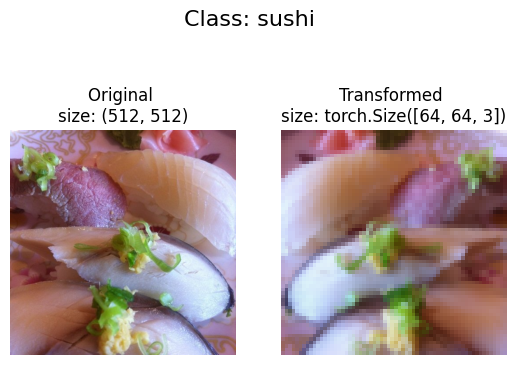

In [14]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths,
                            transform,
                            n=3):
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}")
      ax[0].axis("off")

      # Transform dan plot gambar
      # Lakukan permutasi agar kompatibel dengan matplotlib
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

  

### Load image data using `ImageFolder`


In [15]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=0,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=0,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1e6a78ade50>,
 <torch.utils.data.dataloader.DataLoader at 0x1e6a7a546d0>)

In [20]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.


In [21]:
import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*16*16,
                out_features=output_shape)
    )

  def forward(self, x):
    return (self.classifier(self.conv_block_2(self.conv_block_1(x))))



In [22]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

## 4. Create training and testing functions for `model_0`.


In [23]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item() / len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc
  

In [24]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X,y) in enumerate(dataloader):

      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [25]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

d:\UNSRI_DATA\MACHINE LEARNING\pytorch_course\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

- Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.


In [26]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)


 20%|██        | 1/5 [00:02<00:09,  2.49s/it]

Epoch: 1 | train_loss: 1.1172 | train_acc: 0.2978 | test_loss: 1.0971 | test_acc: 0.3333


 40%|████      | 2/5 [00:04<00:06,  2.06s/it]

Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3022 | test_loss: 1.0995 | test_acc: 0.2533


 60%|██████    | 3/5 [00:05<00:03,  1.82s/it]

Epoch: 3 | train_loss: 1.0997 | train_acc: 0.3556 | test_loss: 1.0933 | test_acc: 0.4267


 80%|████████  | 4/5 [00:07<00:01,  1.72s/it]

Epoch: 4 | train_loss: 1.0376 | train_acc: 0.4489 | test_loss: 0.9759 | test_acc: 0.4933


100%|██████████| 5/5 [00:08<00:00,  1.79s/it]

Epoch: 5 | train_loss: 0.8697 | train_acc: 0.6222 | test_loss: 1.0249 | test_acc: 0.5333


In [27]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

 20%|██        | 1/5 [00:01<00:06,  1.59s/it]

Epoch: 1 | train_loss: 1.1172 | train_acc: 0.2978 | test_loss: 1.0971 | test_acc: 0.3333


 40%|████      | 2/5 [00:03<00:04,  1.60s/it]

Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3022 | test_loss: 1.0995 | test_acc: 0.2533


 60%|██████    | 3/5 [00:04<00:03,  1.64s/it]

Epoch: 3 | train_loss: 1.0997 | train_acc: 0.3556 | test_loss: 1.0933 | test_acc: 0.4267


 80%|████████  | 4/5 [00:06<00:01,  1.60s/it]

Epoch: 4 | train_loss: 1.0376 | train_acc: 0.4489 | test_loss: 0.9759 | test_acc: 0.4933


100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

Epoch: 5 | train_loss: 0.8697 | train_acc: 0.6222 | test_loss: 1.0249 | test_acc: 0.5333


In [28]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                             lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

 20%|██        | 1/5 [00:01<00:06,  1.58s/it]

Epoch: 1 | train_loss: 1.1172 | train_acc: 0.2978 | test_loss: 1.0971 | test_acc: 0.3333


 40%|████      | 2/5 [00:03<00:04,  1.58s/it]

Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3022 | test_loss: 1.0995 | test_acc: 0.2533


 60%|██████    | 3/5 [00:04<00:03,  1.54s/it]

Epoch: 3 | train_loss: 1.0997 | train_acc: 0.3556 | test_loss: 1.0933 | test_acc: 0.4267


 80%|████████  | 4/5 [00:06<00:01,  1.53s/it]

Epoch: 4 | train_loss: 1.0376 | train_acc: 0.4489 | test_loss: 0.9759 | test_acc: 0.4933


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

Epoch: 5 | train_loss: 0.8697 | train_acc: 0.6222 | test_loss: 1.0249 | test_acc: 0.5333


It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.


## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?


In [29]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                             lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=50)


  2%|▏         | 1/50 [00:01<01:16,  1.57s/it]

Epoch: 1 | train_loss: 1.0911 | train_acc: 0.3689 | test_loss: 1.0687 | test_acc: 0.3467


  4%|▍         | 2/50 [00:03<01:14,  1.55s/it]

Epoch: 2 | train_loss: 1.0502 | train_acc: 0.4889 | test_loss: 1.0352 | test_acc: 0.3467


  6%|▌         | 3/50 [00:04<01:20,  1.70s/it]

Epoch: 3 | train_loss: 0.9635 | train_acc: 0.5867 | test_loss: 0.9803 | test_acc: 0.5200


  8%|▊         | 4/50 [00:06<01:17,  1.69s/it]

Epoch: 4 | train_loss: 0.8861 | train_acc: 0.5911 | test_loss: 1.0356 | test_acc: 0.4400


 10%|█         | 5/50 [00:08<01:15,  1.67s/it]

Epoch: 5 | train_loss: 0.8612 | train_acc: 0.5956 | test_loss: 1.2384 | test_acc: 0.4400


 12%|█▏        | 6/50 [00:10<01:14,  1.70s/it]

Epoch: 6 | train_loss: 0.8495 | train_acc: 0.6267 | test_loss: 0.9566 | test_acc: 0.4933


 14%|█▍        | 7/50 [00:11<01:15,  1.75s/it]

Epoch: 7 | train_loss: 0.8059 | train_acc: 0.6711 | test_loss: 1.2650 | test_acc: 0.3467


 16%|█▌        | 8/50 [00:13<01:12,  1.74s/it]

Epoch: 8 | train_loss: 0.7804 | train_acc: 0.6844 | test_loss: 0.9449 | test_acc: 0.5200


 18%|█▊        | 9/50 [00:15<01:13,  1.79s/it]

Epoch: 9 | train_loss: 0.7147 | train_acc: 0.7111 | test_loss: 1.0002 | test_acc: 0.4933


 20%|██        | 10/50 [00:17<01:13,  1.84s/it]

Epoch: 10 | train_loss: 0.6470 | train_acc: 0.7289 | test_loss: 1.0275 | test_acc: 0.4667


 22%|██▏       | 11/50 [00:18<01:07,  1.74s/it]

Epoch: 11 | train_loss: 0.6354 | train_acc: 0.7600 | test_loss: 1.0081 | test_acc: 0.5600


 24%|██▍       | 12/50 [00:20<01:05,  1.73s/it]

Epoch: 12 | train_loss: 0.5667 | train_acc: 0.7600 | test_loss: 1.1795 | test_acc: 0.5600


 26%|██▌       | 13/50 [00:22<01:03,  1.72s/it]

Epoch: 13 | train_loss: 0.5377 | train_acc: 0.7644 | test_loss: 1.3804 | test_acc: 0.4800


 28%|██▊       | 14/50 [00:24<01:00,  1.69s/it]

Epoch: 14 | train_loss: 0.4461 | train_acc: 0.8400 | test_loss: 1.7739 | test_acc: 0.5067


 30%|███       | 15/50 [00:25<00:57,  1.66s/it]

Epoch: 15 | train_loss: 0.3951 | train_acc: 0.8356 | test_loss: 1.8570 | test_acc: 0.5067


 32%|███▏      | 16/50 [00:27<00:55,  1.63s/it]

Epoch: 16 | train_loss: 0.3175 | train_acc: 0.8800 | test_loss: 1.7695 | test_acc: 0.5067


 34%|███▍      | 17/50 [00:28<00:53,  1.63s/it]

Epoch: 17 | train_loss: 0.2916 | train_acc: 0.8844 | test_loss: 1.5195 | test_acc: 0.4667


 36%|███▌      | 18/50 [00:30<00:51,  1.61s/it]

Epoch: 18 | train_loss: 0.2371 | train_acc: 0.8889 | test_loss: 2.0373 | test_acc: 0.4933


 38%|███▊      | 19/50 [00:31<00:49,  1.59s/it]

Epoch: 19 | train_loss: 0.1972 | train_acc: 0.9289 | test_loss: 2.3209 | test_acc: 0.5067


 40%|████      | 20/50 [00:33<00:47,  1.58s/it]

Epoch: 20 | train_loss: 0.1578 | train_acc: 0.9422 | test_loss: 2.5459 | test_acc: 0.4000


 42%|████▏     | 21/50 [00:35<00:46,  1.59s/it]

Epoch: 21 | train_loss: 0.1406 | train_acc: 0.9511 | test_loss: 2.6214 | test_acc: 0.4800


 44%|████▍     | 22/50 [00:36<00:44,  1.59s/it]

Epoch: 22 | train_loss: 0.1670 | train_acc: 0.9467 | test_loss: 3.5591 | test_acc: 0.4133


 46%|████▌     | 23/50 [00:38<00:43,  1.61s/it]

Epoch: 23 | train_loss: 0.1375 | train_acc: 0.9556 | test_loss: 3.1115 | test_acc: 0.4933


 48%|████▊     | 24/50 [00:39<00:41,  1.60s/it]

Epoch: 24 | train_loss: 0.0624 | train_acc: 0.9778 | test_loss: 3.7819 | test_acc: 0.4933


 50%|█████     | 25/50 [00:41<00:40,  1.61s/it]

Epoch: 25 | train_loss: 0.0526 | train_acc: 0.9822 | test_loss: 3.5116 | test_acc: 0.4667


 52%|█████▏    | 26/50 [00:43<00:38,  1.61s/it]

Epoch: 26 | train_loss: 0.1705 | train_acc: 0.9333 | test_loss: 2.9834 | test_acc: 0.4933


 54%|█████▍    | 27/50 [00:44<00:37,  1.61s/it]

Epoch: 27 | train_loss: 0.1731 | train_acc: 0.9378 | test_loss: 2.6968 | test_acc: 0.4933


 56%|█████▌    | 28/50 [00:46<00:35,  1.61s/it]

Epoch: 28 | train_loss: 0.0579 | train_acc: 0.9867 | test_loss: 3.2910 | test_acc: 0.5067


 58%|█████▊    | 29/50 [00:47<00:33,  1.60s/it]

Epoch: 29 | train_loss: 0.0445 | train_acc: 0.9867 | test_loss: 3.5400 | test_acc: 0.4533


 60%|██████    | 30/50 [00:49<00:32,  1.63s/it]

Epoch: 30 | train_loss: 0.0228 | train_acc: 0.9956 | test_loss: 3.7257 | test_acc: 0.4800


 62%|██████▏   | 31/50 [00:51<00:31,  1.64s/it]

Epoch: 31 | train_loss: 0.0082 | train_acc: 1.0000 | test_loss: 4.1452 | test_acc: 0.5067


 64%|██████▍   | 32/50 [00:52<00:29,  1.65s/it]

Epoch: 32 | train_loss: 0.0122 | train_acc: 1.0000 | test_loss: 4.8802 | test_acc: 0.4800


 66%|██████▌   | 33/50 [00:54<00:27,  1.64s/it]

Epoch: 33 | train_loss: 0.1244 | train_acc: 0.9644 | test_loss: 4.0347 | test_acc: 0.4933


 68%|██████▊   | 34/50 [00:56<00:26,  1.63s/it]

Epoch: 34 | train_loss: 0.1277 | train_acc: 0.9600 | test_loss: 3.9134 | test_acc: 0.4933


 70%|███████   | 35/50 [00:57<00:24,  1.63s/it]

Epoch: 35 | train_loss: 0.0665 | train_acc: 0.9822 | test_loss: 3.9765 | test_acc: 0.4667


 72%|███████▏  | 36/50 [00:59<00:22,  1.62s/it]

Epoch: 36 | train_loss: 0.0217 | train_acc: 0.9911 | test_loss: 4.2248 | test_acc: 0.5333


 74%|███████▍  | 37/50 [01:01<00:21,  1.63s/it]

Epoch: 37 | train_loss: 0.0268 | train_acc: 0.9822 | test_loss: 4.5600 | test_acc: 0.5200


 76%|███████▌  | 38/50 [01:02<00:19,  1.62s/it]

Epoch: 38 | train_loss: 0.1324 | train_acc: 0.9511 | test_loss: 3.9323 | test_acc: 0.5067


 78%|███████▊  | 39/50 [01:04<00:17,  1.63s/it]

Epoch: 39 | train_loss: 0.0452 | train_acc: 0.9867 | test_loss: 4.7839 | test_acc: 0.4533


 80%|████████  | 40/50 [01:05<00:16,  1.63s/it]

Epoch: 40 | train_loss: 0.0253 | train_acc: 0.9956 | test_loss: 4.8094 | test_acc: 0.4933


 82%|████████▏ | 41/50 [01:07<00:14,  1.64s/it]

Epoch: 41 | train_loss: 0.0835 | train_acc: 0.9600 | test_loss: 4.8261 | test_acc: 0.4933


 84%|████████▍ | 42/50 [01:09<00:13,  1.63s/it]

Epoch: 42 | train_loss: 0.0607 | train_acc: 0.9822 | test_loss: 4.5577 | test_acc: 0.5067


 86%|████████▌ | 43/50 [01:10<00:11,  1.62s/it]

Epoch: 43 | train_loss: 0.0149 | train_acc: 0.9956 | test_loss: 4.7689 | test_acc: 0.5067


 88%|████████▊ | 44/50 [01:12<00:09,  1.61s/it]

Epoch: 44 | train_loss: 0.0099 | train_acc: 1.0000 | test_loss: 5.7412 | test_acc: 0.5200


 90%|█████████ | 45/50 [01:14<00:08,  1.61s/it]

Epoch: 45 | train_loss: 0.1408 | train_acc: 0.9556 | test_loss: 5.1739 | test_acc: 0.5067


 92%|█████████▏| 46/50 [01:15<00:06,  1.62s/it]

Epoch: 46 | train_loss: 0.0566 | train_acc: 0.9822 | test_loss: 4.3551 | test_acc: 0.5067


 94%|█████████▍| 47/50 [01:17<00:05,  1.68s/it]

Epoch: 47 | train_loss: 0.0194 | train_acc: 0.9956 | test_loss: 4.5842 | test_acc: 0.5067


 96%|█████████▌| 48/50 [01:19<00:03,  1.66s/it]

Epoch: 48 | train_loss: 0.0063 | train_acc: 1.0000 | test_loss: 4.8867 | test_acc: 0.5600


 98%|█████████▊| 49/50 [01:20<00:01,  1.66s/it]

Epoch: 49 | train_loss: 0.0023 | train_acc: 1.0000 | test_loss: 4.8930 | test_acc: 0.5467


100%|██████████| 50/50 [01:22<00:00,  1.65s/it]

Epoch: 50 | train_loss: 0.0028 | train_acc: 1.0000 | test_loss: 5.0686 | test_acc: 0.5467


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.


## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?

- **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
- You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.


In [107]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# # If the image folder doesn't exist, download it and prepare it... 
# if image_path.is_dir():
#     print(f"{image_path} directory exists.")
# else:
#     print(f"Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)
    
# # Download pizza, steak, sushi data
# with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
#     print("Downloading pizza, steak, sushi 20% data...")
#     f.write(request.content)

# # Unzip pizza, steak, sushi data
# with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
#     print("Unzipping pizza, steak, sushi 20% data...") 
#     zip_ref.extractall(image_path)

In [108]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 276 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 348 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 276 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images...


In [109]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [110]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.TrivialAugmentWide(num_magnitude_bins=31),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)
test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent,
                                         batch_size=32,
                                         num_workers=0,
                                         shuffle=True)
test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent,
                                        batch_size=32,
                                        num_workers=0,
                                        shuffle=False)

train_data_20_percent, test_data_20_percent


(Dataset ImageFolder
     Number of datapoints: 900
     Root location: data\pizza_steak_sushi_20_percent\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 450
     Root location: data\pizza_steak_sushi_20_percent\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ))

In [111]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(),
                             lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent,
                        test_dataloader=test_dataloader_20_percent,
                        optimizer=optimizer,
                        epochs=50)

  2%|▏         | 1/50 [00:03<03:09,  3.87s/it]

Epoch: 1 | train_loss: 1.0769 | train_acc: 0.3976 | test_loss: 1.0880 | test_acc: 0.3979


  4%|▍         | 2/50 [00:07<02:54,  3.63s/it]

Epoch: 2 | train_loss: 0.9629 | train_acc: 0.5366 | test_loss: 0.9940 | test_acc: 0.4833


  6%|▌         | 3/50 [00:11<03:03,  3.91s/it]

Epoch: 3 | train_loss: 0.9114 | train_acc: 0.5625 | test_loss: 0.9627 | test_acc: 0.5500


  8%|▊         | 4/50 [00:15<02:53,  3.76s/it]

Epoch: 4 | train_loss: 0.8779 | train_acc: 0.5808 | test_loss: 0.9653 | test_acc: 0.5125


 10%|█         | 5/50 [00:18<02:47,  3.73s/it]

Epoch: 5 | train_loss: 0.7651 | train_acc: 0.6627 | test_loss: 1.0505 | test_acc: 0.4729


 12%|█▏        | 6/50 [00:23<02:52,  3.92s/it]

Epoch: 6 | train_loss: 0.7208 | train_acc: 0.6950 | test_loss: 0.9594 | test_acc: 0.5250


 14%|█▍        | 7/50 [00:26<02:45,  3.85s/it]

Epoch: 7 | train_loss: 0.6948 | train_acc: 0.6983 | test_loss: 0.9832 | test_acc: 0.5687


 16%|█▌        | 8/50 [00:30<02:33,  3.66s/it]

Epoch: 8 | train_loss: 0.5983 | train_acc: 0.7511 | test_loss: 1.1004 | test_acc: 0.5083


 18%|█▊        | 9/50 [00:33<02:29,  3.64s/it]

Epoch: 9 | train_loss: 0.5902 | train_acc: 0.7834 | test_loss: 1.1429 | test_acc: 0.5312


 20%|██        | 10/50 [00:37<02:24,  3.61s/it]

Epoch: 10 | train_loss: 0.5844 | train_acc: 0.7694 | test_loss: 1.0702 | test_acc: 0.5104


 22%|██▏       | 11/50 [00:41<02:29,  3.82s/it]

Epoch: 11 | train_loss: 0.5395 | train_acc: 0.7963 | test_loss: 1.1691 | test_acc: 0.4938


 24%|██▍       | 12/50 [00:45<02:22,  3.75s/it]

Epoch: 12 | train_loss: 0.4895 | train_acc: 0.8006 | test_loss: 1.0930 | test_acc: 0.5833


 26%|██▌       | 13/50 [00:48<02:16,  3.69s/it]

Epoch: 13 | train_loss: 0.4924 | train_acc: 0.8082 | test_loss: 1.2592 | test_acc: 0.5188


 28%|██▊       | 14/50 [00:53<02:22,  3.95s/it]

Epoch: 14 | train_loss: 0.4734 | train_acc: 0.8222 | test_loss: 1.1772 | test_acc: 0.5250


 30%|███       | 15/50 [00:57<02:18,  3.96s/it]

Epoch: 15 | train_loss: 0.4597 | train_acc: 0.8254 | test_loss: 1.0079 | test_acc: 0.5667


 32%|███▏      | 16/50 [01:00<02:10,  3.82s/it]

Epoch: 16 | train_loss: 0.4187 | train_acc: 0.8373 | test_loss: 1.1664 | test_acc: 0.5813


 34%|███▍      | 17/50 [01:05<02:12,  4.00s/it]

Epoch: 17 | train_loss: 0.4333 | train_acc: 0.8244 | test_loss: 1.1239 | test_acc: 0.5604


 36%|███▌      | 18/50 [01:08<02:01,  3.80s/it]

Epoch: 18 | train_loss: 0.4427 | train_acc: 0.8233 | test_loss: 1.1271 | test_acc: 0.5229


 38%|███▊      | 19/50 [01:11<01:55,  3.71s/it]

Epoch: 19 | train_loss: 0.3919 | train_acc: 0.8502 | test_loss: 1.1634 | test_acc: 0.5563


 40%|████      | 20/50 [01:16<01:56,  3.87s/it]

Epoch: 20 | train_loss: 0.4092 | train_acc: 0.8394 | test_loss: 1.3469 | test_acc: 0.4646


 42%|████▏     | 21/50 [01:19<01:52,  3.86s/it]

Epoch: 21 | train_loss: 0.3986 | train_acc: 0.8416 | test_loss: 1.1494 | test_acc: 0.5479


 44%|████▍     | 22/50 [01:23<01:42,  3.66s/it]

Epoch: 22 | train_loss: 0.4189 | train_acc: 0.8373 | test_loss: 1.1653 | test_acc: 0.5687


 46%|████▌     | 23/50 [01:26<01:38,  3.67s/it]

Epoch: 23 | train_loss: 0.4056 | train_acc: 0.8470 | test_loss: 1.1367 | test_acc: 0.5333


 48%|████▊     | 24/50 [01:31<01:39,  3.84s/it]

Epoch: 24 | train_loss: 0.4173 | train_acc: 0.8394 | test_loss: 1.1655 | test_acc: 0.5354


 50%|█████     | 25/50 [01:34<01:31,  3.65s/it]

Epoch: 25 | train_loss: 0.4068 | train_acc: 0.8384 | test_loss: 1.1054 | test_acc: 0.5479


 52%|█████▏    | 26/50 [01:37<01:26,  3.58s/it]

Epoch: 26 | train_loss: 0.3555 | train_acc: 0.8696 | test_loss: 1.2258 | test_acc: 0.5667


 54%|█████▍    | 27/50 [01:41<01:26,  3.76s/it]

Epoch: 27 | train_loss: 0.3995 | train_acc: 0.8384 | test_loss: 1.2096 | test_acc: 0.5583


 56%|█████▌    | 28/50 [01:44<01:18,  3.55s/it]

Epoch: 28 | train_loss: 0.3527 | train_acc: 0.8588 | test_loss: 1.2480 | test_acc: 0.5417


 58%|█████▊    | 29/50 [01:48<01:14,  3.53s/it]

Epoch: 29 | train_loss: 0.3474 | train_acc: 0.8631 | test_loss: 1.1757 | test_acc: 0.5604


 60%|██████    | 30/50 [01:52<01:14,  3.73s/it]

Epoch: 30 | train_loss: 0.3769 | train_acc: 0.8534 | test_loss: 1.3011 | test_acc: 0.5062


 62%|██████▏   | 31/50 [01:55<01:08,  3.58s/it]

Epoch: 31 | train_loss: 0.3539 | train_acc: 0.8631 | test_loss: 1.4626 | test_acc: 0.5125


 64%|██████▍   | 32/50 [01:59<01:04,  3.61s/it]

Epoch: 32 | train_loss: 0.3876 | train_acc: 0.8491 | test_loss: 1.2470 | test_acc: 0.5167


 66%|██████▌   | 33/50 [02:03<01:04,  3.81s/it]

Epoch: 33 | train_loss: 0.3095 | train_acc: 0.8825 | test_loss: 1.2693 | test_acc: 0.4938


 68%|██████▊   | 34/50 [02:07<00:59,  3.75s/it]

Epoch: 34 | train_loss: 0.3063 | train_acc: 0.8825 | test_loss: 1.3196 | test_acc: 0.5375


 70%|███████   | 35/50 [02:10<00:55,  3.67s/it]

Epoch: 35 | train_loss: 0.3300 | train_acc: 0.8825 | test_loss: 1.2332 | test_acc: 0.5604


 72%|███████▏  | 36/50 [02:15<00:53,  3.83s/it]

Epoch: 36 | train_loss: 0.3271 | train_acc: 0.8675 | test_loss: 1.1718 | test_acc: 0.5729


 74%|███████▍  | 37/50 [02:18<00:46,  3.61s/it]

Epoch: 37 | train_loss: 0.3519 | train_acc: 0.8578 | test_loss: 1.2157 | test_acc: 0.4917


 76%|███████▌  | 38/50 [02:21<00:42,  3.57s/it]

Epoch: 38 | train_loss: 0.3364 | train_acc: 0.8556 | test_loss: 1.3069 | test_acc: 0.5146


 78%|███████▊  | 39/50 [02:25<00:41,  3.76s/it]

Epoch: 39 | train_loss: 0.2928 | train_acc: 0.8879 | test_loss: 1.2064 | test_acc: 0.5479


 80%|████████  | 40/50 [02:29<00:36,  3.67s/it]

Epoch: 40 | train_loss: 0.3224 | train_acc: 0.8772 | test_loss: 1.2788 | test_acc: 0.5708


 82%|████████▏ | 41/50 [02:32<00:32,  3.58s/it]

Epoch: 41 | train_loss: 0.2577 | train_acc: 0.8879 | test_loss: 1.4622 | test_acc: 0.5250


 84%|████████▍ | 42/50 [02:36<00:30,  3.76s/it]

Epoch: 42 | train_loss: 0.2805 | train_acc: 0.9030 | test_loss: 1.4239 | test_acc: 0.5396


 86%|████████▌ | 43/50 [02:40<00:25,  3.64s/it]

Epoch: 43 | train_loss: 0.3204 | train_acc: 0.8750 | test_loss: 1.2436 | test_acc: 0.5500


 88%|████████▊ | 44/50 [02:43<00:21,  3.57s/it]

Epoch: 44 | train_loss: 0.2496 | train_acc: 0.9030 | test_loss: 1.1567 | test_acc: 0.5813


 90%|█████████ | 45/50 [02:47<00:18,  3.77s/it]

Epoch: 45 | train_loss: 0.2828 | train_acc: 0.8944 | test_loss: 1.2307 | test_acc: 0.5208


 92%|█████████▏| 46/50 [02:51<00:15,  3.78s/it]

Epoch: 46 | train_loss: 0.3236 | train_acc: 0.8631 | test_loss: 1.3333 | test_acc: 0.5563


 94%|█████████▍| 47/50 [02:55<00:11,  3.69s/it]

Epoch: 47 | train_loss: 0.2871 | train_acc: 0.8922 | test_loss: 1.2400 | test_acc: 0.5396


 96%|█████████▌| 48/50 [02:59<00:07,  3.90s/it]

Epoch: 48 | train_loss: 0.2607 | train_acc: 0.8987 | test_loss: 1.3320 | test_acc: 0.5729


 98%|█████████▊| 49/50 [03:03<00:03,  3.86s/it]

Epoch: 49 | train_loss: 0.2929 | train_acc: 0.8976 | test_loss: 1.3036 | test_acc: 0.5333


100%|██████████| 50/50 [03:07<00:00,  3.74s/it]

Epoch: 50 | train_loss: 0.3239 | train_acc: 0.8815 | test_loss: 1.1816 | test_acc: 0.5687


In [112]:
# Visualisasi ke 4 model dengan pandas

import pandas as pd
model_3_df = pd.DataFrame(model_3_results)
model_4_df = pd.DataFrame(model_4_results)

model_3_df.tail(), model_4_df.tail()

(    train_loss  train_acc  test_loss  test_acc
 45    0.056630   0.982222   4.355069  0.506667
 46    0.019386   0.995556   4.584233  0.506667
 47    0.006263   1.000000   4.886696  0.560000
 48    0.002262   1.000000   4.892976  0.546667
 49    0.002780   1.000000   5.068567  0.546667,
     train_loss  train_acc  test_loss  test_acc
 45    0.323642   0.863147   1.333281  0.556250
 46    0.287091   0.892241   1.240004  0.539583
 47    0.260681   0.898707   1.331970  0.572917
 48    0.292945   0.897629   1.303619  0.533333
 49    0.323882   0.881466   1.181594  0.568750)

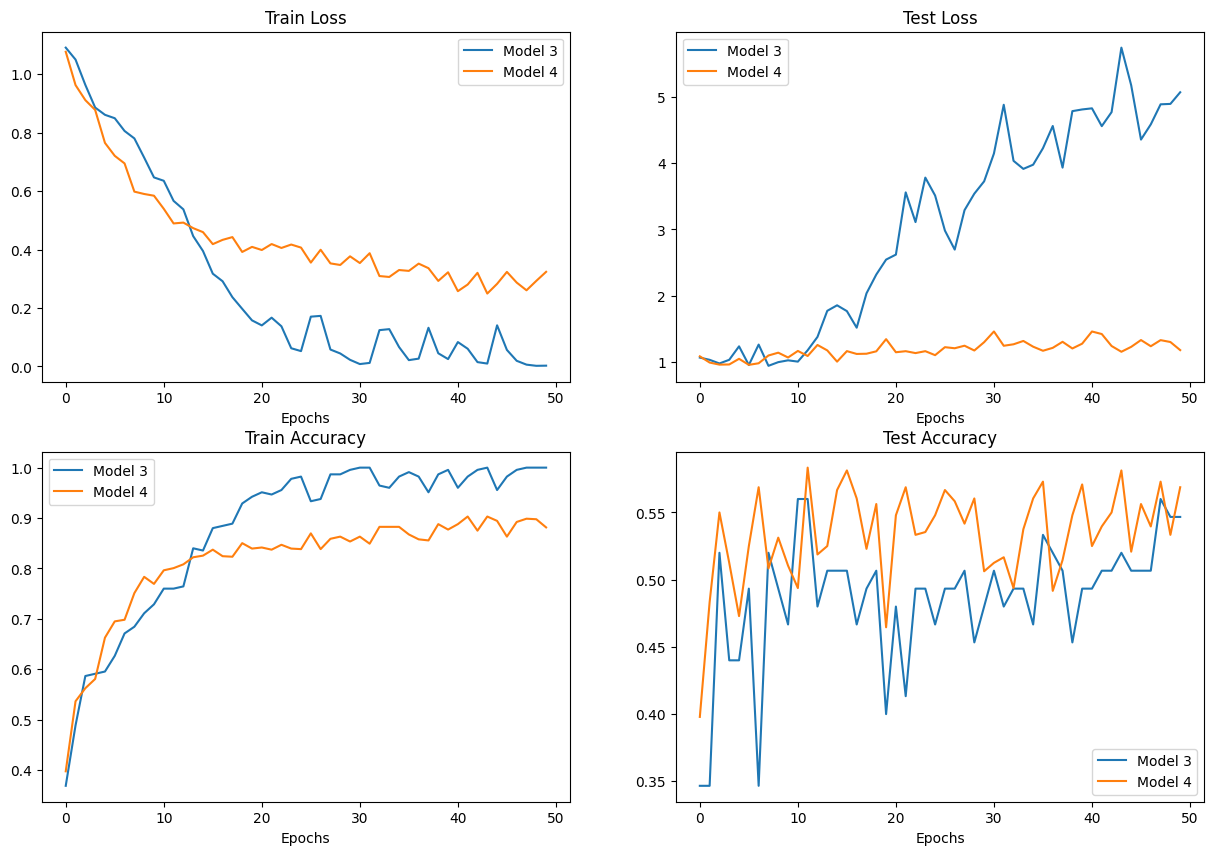

In [113]:
# Setup plot
plt.figure(figsize=(15,10))

# Ambil jumlah epochs
epochs = range(len(model_4_df))

# Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_3_df["train_loss"], label="Model 3")
plt.plot(epochs, model_4_df["train_loss"], label="Model 4")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_3_df["test_loss"], label="Model 3")
plt.plot(epochs, model_4_df["test_loss"], label="Model 4")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_3_df["train_acc"], label="Model 3")
plt.plot(epochs, model_4_df["train_acc"], label="Model 4")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_3_df["test_acc"], label="Model 3")
plt.plot(epochs, model_4_df["test_acc"], label="Model 4")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.

- Does the model you trained in exercise 7 get it right?
- If not, what do you think you could do to improve it?


In [123]:
import torchvision

custom_image = "steak.jpg"

img = torchvision.io.read_image(custom_image)
img

tensor([[[147, 148, 149,  ...,  94,  93,  87],
         [145, 146, 147,  ...,  93,  91,  87],
         [141, 142, 143,  ...,  90,  88,  87],
         ...,
         [171, 175, 178,  ...,   0,   0,   0],
         [170, 172, 174,  ...,   0,   0,   0],
         [169, 169, 170,  ...,   0,   0,   0]],

        [[128, 129, 130,  ...,  56,  58,  56],
         [126, 127, 128,  ...,  55,  56,  56],
         [122, 123, 124,  ...,  52,  53,  57],
         ...,
         [140, 144, 147,  ...,   2,   2,   1],
         [139, 141, 143,  ...,   2,   2,   1],
         [140, 140, 141,  ...,   1,   1,   1]],

        [[156, 157, 158,  ...,  53,  54,  51],
         [154, 155, 156,  ...,  52,  52,  51],
         [150, 151, 152,  ...,  49,  49,  49],
         ...,
         [145, 149, 152,  ...,  17,  19,  21],
         [144, 146, 148,  ...,  19,  19,  21],
         [142, 142, 143,  ...,  21,  21,  22]]], dtype=torch.uint8)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

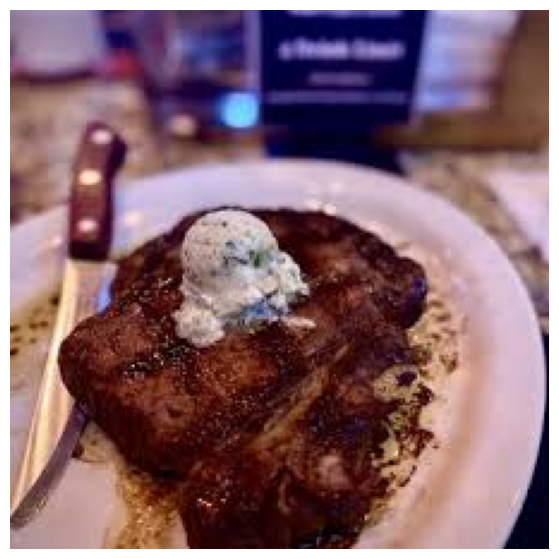

In [124]:
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis(False)

tensor([[0.0016, 0.9629, 0.0355]], device='cuda:0')


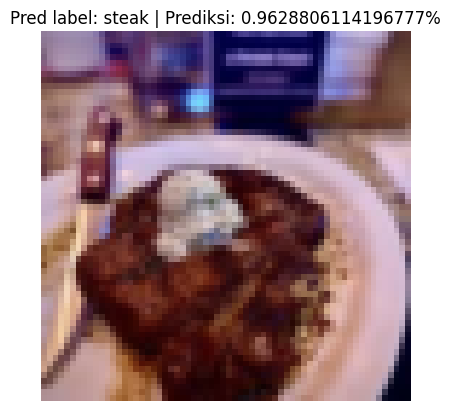

In [125]:
# Buat prediksi dengan gambar
model_4.eval()
with torch.inference_mode():
  # Ambil piksel gambar 
  img = img / 255.

  # Resize gambar ke 64x64
  resize = transforms.Resize(size=(64,64))
  img = resize(img)

  # Ubah gambar ke tipa batch dan lempar ke device
  batch = img.unsqueeze(0).to(device)

  # Prediksi gambar
  y_pred_logit = model_4(batch)

  # Lihat probabilitas
  pred_prob = torch.softmax(y_pred_logit, dim=1)
  print(pred_prob)

  # Konveri pred logit ke pred label
  pred_label = torch.argmax(pred_prob,dim=1)

  # Plot gambar
  plt.imshow(img.permute(1,2,0))
  plt.title(f"Pred label: {class_names[pred_label]} | Prediksi: {pred_prob.max().cpu()}%")
  plt.axis(False)